# Algorithm comparison: Breast Cancer Wisconsin 
## Created by Ramses Alexander Coraspe Valdez
## Created on December 4, 2019

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler, PowerTransformer 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [172]:
missing = ["?"]
df1 = pd.read_csv('https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Logistic%20Regression/breast-cancer-wisconsin.data',                  
                  sep=',', 
                  names=["id", "Clump_Thickness", "Uniformity_CellSize", "Uniformity_CellShape", 'Marginal_Adhesion', 'Single_Epithelial_CellSize', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'], 
                  na_values = missing);
df1.shape

(699, 11)

In [173]:
df1.isnull().sum()

id                             0
Clump_Thickness                0
Uniformity_CellSize            0
Uniformity_CellShape           0
Marginal_Adhesion              0
Single_Epithelial_CellSize     0
Bare_Nuclei                   16
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [174]:
mdn = df1['Bare_Nuclei'].median()
df1['Bare_Nuclei'].fillna(mdn, inplace=True)
df1.isnull().sum()

id                            0
Clump_Thickness               0
Uniformity_CellSize           0
Uniformity_CellShape          0
Marginal_Adhesion             0
Single_Epithelial_CellSize    0
Bare_Nuclei                   0
Bland_Chromatin               0
Normal_Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [0]:
df1.drop(['id'], axis = 1, inplace = True)
#df1.drop(df1.columns[[0]], axis = 1, inplace = True) 
benign = df1[df1['Class']==2]
malignant = df1[df1['Class']==4]

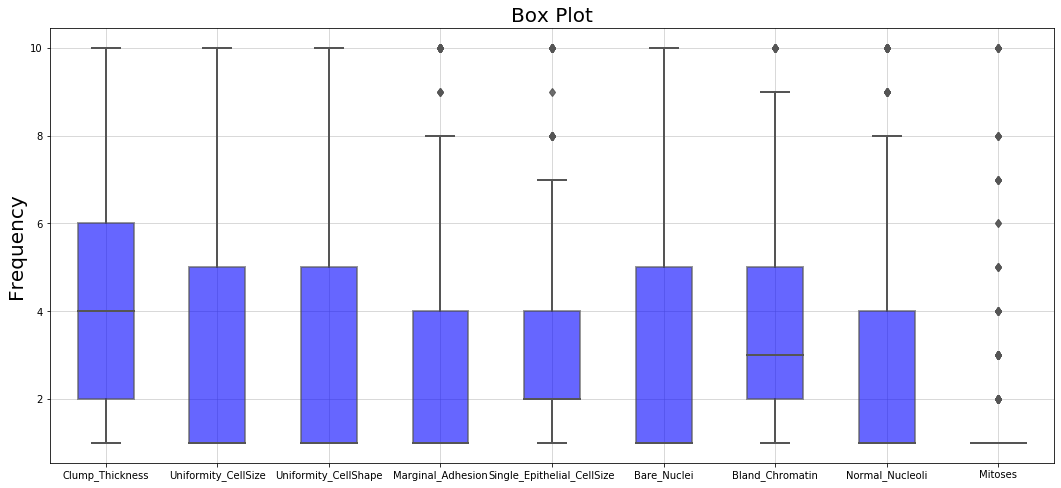

In [176]:
plt.figure(1, figsize=(18, 8));
bp = plt.boxplot([df1.Clump_Thickness, df1.Uniformity_CellSize, df1.Uniformity_CellShape, df1.Marginal_Adhesion, df1.Single_Epithelial_CellSize, df1.Bare_Nuclei, df1.Bland_Chromatin, df1.Normal_Nucleoli, df1.Mitoses], vert=True, patch_artist=True,
              flierprops={'alpha':0.6, 'markersize': 6,
                   'markeredgecolor': '#555555','marker': 'd',
                   'markerfacecolor': "#555555"}, 
              capprops={'color': '#555555', 'linewidth': 2},
              boxprops={'color': '#555555', 'linewidth': 2},
              whiskerprops={'color': '#555555', 'linewidth': 2},
              medianprops={'color': '#555555', 'linewidth': 2},
              meanprops={'color': '#555555', 'linewidth': 2});
plt.grid(True, alpha=0.6);
plt.title("Box Plot", fontsize=20);
plt.ylabel("Frequency", fontsize=20);
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9], labels=["Clump_Thickness", "Uniformity_CellSize", "Uniformity_CellShape", 'Marginal_Adhesion', 'Single_Epithelial_CellSize', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'], fontsize=10);
bp['boxes'][0].set(facecolor='blue', alpha= 0.6);
bp['boxes'][1].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][2].set(facecolor='blue', alpha= 0.6);
bp['boxes'][3].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][4].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][5].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][6].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][7].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][8].set(facecolor="blue",alpha= 0.6 );
plt.show();

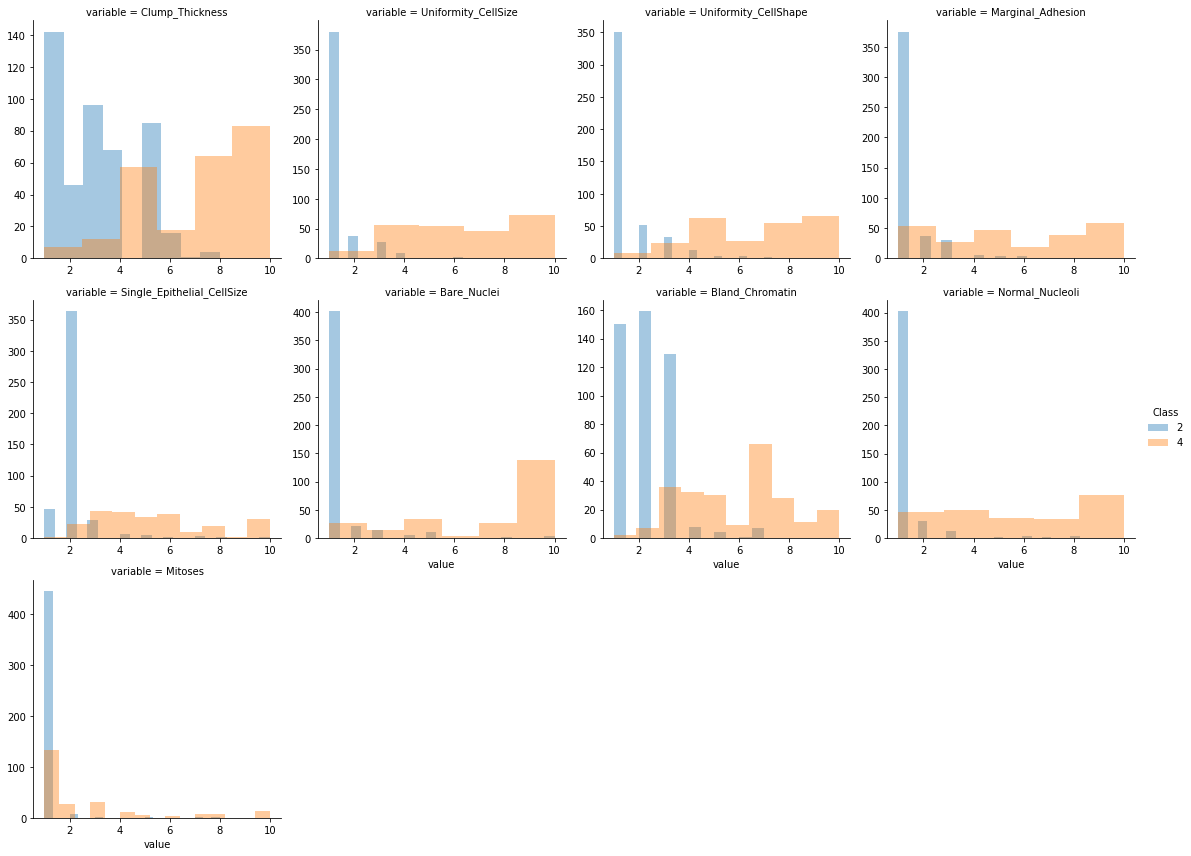

In [177]:
output = 'Class'

cols = [ f for f in df1.columns if df1.dtypes[ f ] != "object"]
cols.remove(output)

f = pd.melt( df1, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=4, height=4, sharex=False, sharey=False )
g = g.map( sns.distplot, "value" , kde=False).add_legend()
plt.plot();

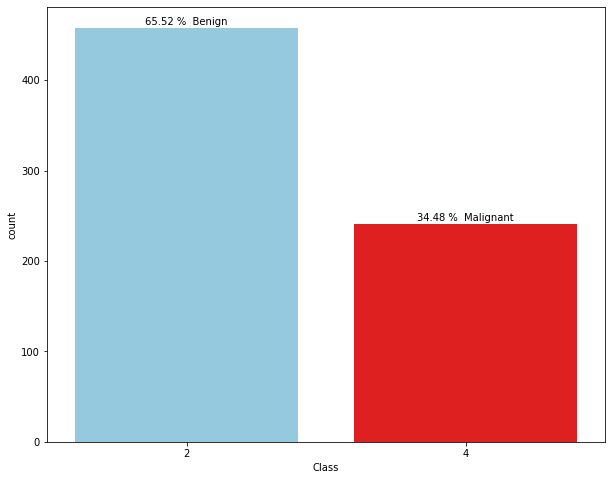

In [178]:
plt.figure(figsize=(10, 8))
ax= sns.countplot(df1['Class'], palette=['skyblue', 'red'])

total = len(df1['Class'])
for p in ax.patches:      
      name = 'Benign'
      if((abs(p.get_x())*10 )- 2 == 4):
         name = 'Malignant' 
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %  {}'.format(round((height/total)*100,2), name ) ,
            ha="center")       
plt.show()

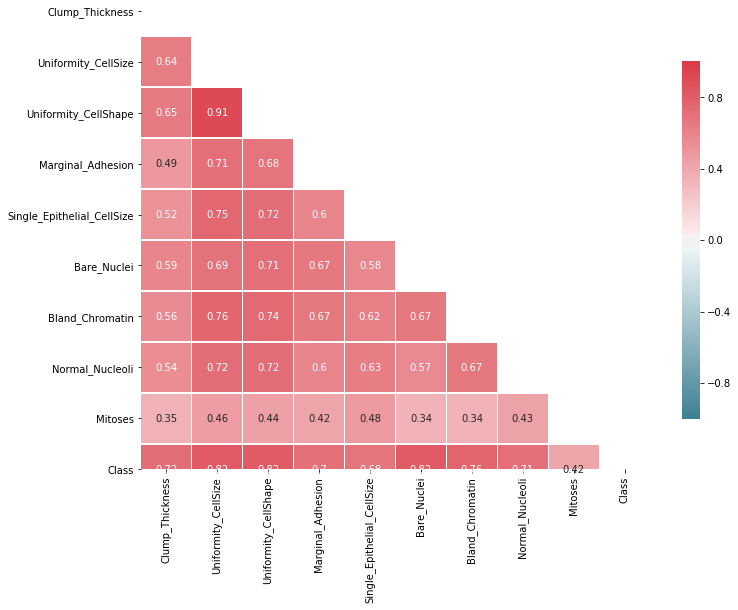

In [179]:
corr = df1.corr(method='pearson').round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))

c_map = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=c_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [0]:
df1.Class = [1 if each == 4 else 0 for each in df1.Class] 
y = df1.Class
x = df1.drop(['Class', 'Uniformity_CellShape'], axis = 1) 

test_sizes = [0.1, 0.2, 0.3]
scaler = StandardScaler()

In [181]:
lg = linear_model.LogisticRegression(random_state = 40, max_iter = 100,solver='lbfgs') 

for i in range(0, 3):   
   print("sklearn - LogisticRegression: " + str(test_sizes[i]))
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)
   lg.fit(x_train,y_train)
   y_pred = lg.predict(x_train)
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = lg.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
   print("")

sklearn - LogisticRegression: 0.1
Train accuracy_score: 0.972972972972973
Train f1_score: 0.9607390300230947
Train roc_auc_score: 0.9685484050983281
Test accuracy_score: 0.9285714285714286
Test f1_score: 0.8979591836734695
Test roc_auc_score: 0.9357076780758558

sklearn - LogisticRegression: 0.2
Train accuracy_score: 0.9749552772808586
Train f1_score: 0.9633507853403142
Train roc_auc_score: 0.9721645231049397
Test accuracy_score: 0.9357142857142857
Test f1_score: 0.9090909090909091
Test roc_auc_score: 0.9277777777777778

sklearn - LogisticRegression: 0.3
Train accuracy_score: 0.9754601226993865
Train f1_score: 0.9651162790697675
Train roc_auc_score: 0.9730944171374073
Test accuracy_score: 0.9476190476190476
Test f1_score: 0.9197080291970804
Test roc_auc_score: 0.938791242676534



In [182]:
clf = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=40, activation='relu', alpha= 0.001, hidden_layer_sizes=(10,5 ,2))

for i in range(0, 3):
   print("Partition: " , test_sizes[i])           
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_train)
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = clf.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred)) 
   cm = metrics.confusion_matrix(y_test, y_pred)    
   print(cm)    
   print("")  

Partition:  0.1
Train accuracy_score: 0.9984101748807631
Train f1_score: 0.9977011494252873
Train roc_auc_score: 0.9977064220183487
Test accuracy_score: 0.9142857142857143
Test f1_score: 0.8749999999999999
Test roc_auc_score: 0.913968547641073
[[43  4]
 [ 2 21]]

Partition:  0.2
Train accuracy_score: 1.0
Train f1_score: 1.0
Train roc_auc_score: 1.0
Test accuracy_score: 0.95
Test f1_score: 0.9320388349514563
Test roc_auc_score: 0.9522222222222221
[[85  5]
 [ 2 48]]

Partition:  0.3
Train accuracy_score: 1.0
Train f1_score: 1.0
Train roc_auc_score: 1.0
Test accuracy_score: 0.9380952380952381
Test f1_score: 0.9064748201438848
Test roc_auc_score: 0.9316990440949738
[[134   7]
 [  6  63]]



In [183]:
svclassifier = SVC(kernel='rbf')
for i in range(0, 3):
   print("Partition: " , test_sizes[i])           
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)   
   svclassifier.fit(x_train,y_train)
   y_pred = svclassifier.predict(x_train)
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = svclassifier.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
   print("") 

Partition:  0.1
Train accuracy_score: 0.9793322734499205
Train f1_score: 0.9702517162471395
Train roc_auc_score: 0.9777227170249336
Test accuracy_score: 0.9285714285714286
Test f1_score: 0.8979591836734695
Test roc_auc_score: 0.9357076780758558

Partition:  0.2
Train accuracy_score: 0.9803220035778175
Train f1_score: 0.971576227390181
Train roc_auc_score: 0.9812770316412474
Test accuracy_score: 0.9357142857142857
Test f1_score: 0.9108910891089109
Test roc_auc_score: 0.9322222222222222

Partition:  0.3
Train accuracy_score: 0.983640081799591
Train f1_score: 0.9770114942528736
Train roc_auc_score: 0.9847223241141515
Test accuracy_score: 0.9428571428571428
Test f1_score: 0.9154929577464788
Test roc_auc_score: 0.9426456984273821



In [0]:
# for k in range(1,50):
#   knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)   
#   for i in range(0, 3):  
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)   
#     scaler.fit(x_train)
#     x_train = scaler.transform(x_train)
#     x_test = scaler.transform(x_test)   
#     knn.fit(x_train,y_train)
#     pred_i = knn.predict(x_test)
#     print(str(k) + ',' + str(test_sizes[i]) + ", " + str(np.mean(pred_i != y_test)))        


In [184]:
knn = KNeighborsClassifier(n_neighbors=7)
for i in range(0, 3):  
   print("Partition: " , test_sizes[i])           
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)   
   knn.fit(x_train,y_train)
   y_pred = knn.predict(x_train)
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = knn.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))  
   cm = metrics.confusion_matrix(y_test, y_pred)    
   print(cm)   
   print("") 

Partition:  0.1
Train accuracy_score: 0.9761526232114467
Train f1_score: 0.9655172413793104
Train roc_auc_score: 0.9731355610616309
Test accuracy_score: 0.9285714285714286
Test f1_score: 0.8979591836734695
Test roc_auc_score: 0.9357076780758558
[[43  4]
 [ 1 22]]

Partition:  0.2
Train accuracy_score: 0.9785330948121646
Train f1_score: 0.9685863874345549
Train roc_auc_score: 0.976141019804234
Test accuracy_score: 0.95
Test f1_score: 0.9292929292929293
Test roc_auc_score: 0.9433333333333332
[[87  3]
 [ 4 46]]

Partition:  0.3
Train accuracy_score: 0.9815950920245399
Train f1_score: 0.9739130434782609
Train roc_auc_score: 0.9804856576920256
Test accuracy_score: 0.9571428571428572
Test f1_score: 0.9343065693430658
Test roc_auc_score: 0.9495837187789085
[[137   4]
 [  5  64]]



In [185]:
naive_bayes = GaussianNB()
for i in range(0, 3):  
   print("Partition: " , test_sizes[i])           
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)   
   naive_bayes.fit(x_train,y_train)
   y_pred = naive_bayes.predict(x_train)
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = naive_bayes.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
   print("") 

Partition:  0.1
Train accuracy_score: 0.9634340222575517
Train f1_score: 0.9487750556792872
Train roc_auc_score: 0.9666342998727651
Test accuracy_score: 0.9428571428571428
Test f1_score: 0.92
Test roc_auc_score: 0.9574468085106382

Partition:  0.2
Train accuracy_score: 0.9677996422182469
Train f1_score: 0.9543147208121827
Train roc_auc_score: 0.9717661620760301
Test accuracy_score: 0.9357142857142857
Test f1_score: 0.9142857142857144
Test roc_auc_score: 0.9411111111111111

Partition:  0.3
Train accuracy_score: 0.9693251533742331
Train f1_score: 0.9577464788732394
Train roc_auc_score: 0.9736813146504293
Test accuracy_score: 0.9428571428571428
Test f1_score: 0.9166666666666666
Test roc_auc_score: 0.9463459759481961

